# Linear Regression

### In this section:  We will be looking into the Polished format of the Linear Regresson. Where we will be :
1. Include essential preporcessing
2. Handle outlier
3. Normalization
4. Vizualization

# Step 1: Import Libraries


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error


# Stpe 2: Load Data

In [13]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Step 3: EDA ( Exploratory Data Analysis)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [16]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [17]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [18]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [21]:
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

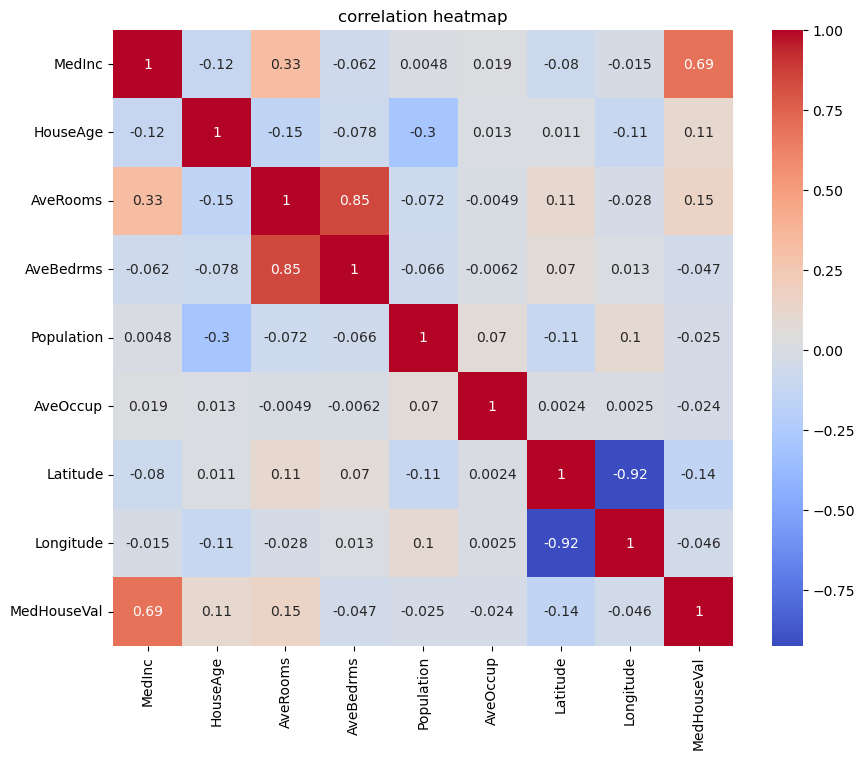

In [22]:
plt.figure(figsize =(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("correlation heatmap")
plt.show
        

<function matplotlib.pyplot.show(close=None, block=None)>

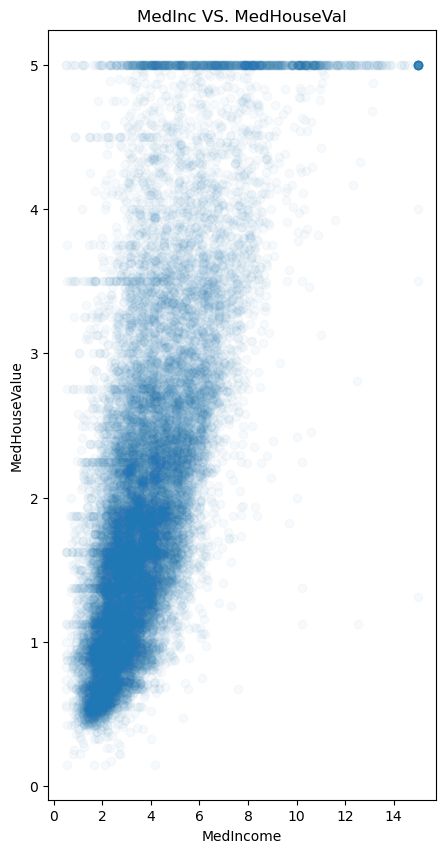

In [26]:
# scatter plot for key feataure
plt.figure(figsize=(5,10))
plt.scatter(df["MedInc"], df["MedHouseVal"], alpha=0.03)
plt.xlabel("MedIncome")
plt.ylabel("MedHouseValue")
plt.title("MedInc VS. MedHouseVal")
plt.show
            


<function matplotlib.pyplot.show(close=None, block=None)>

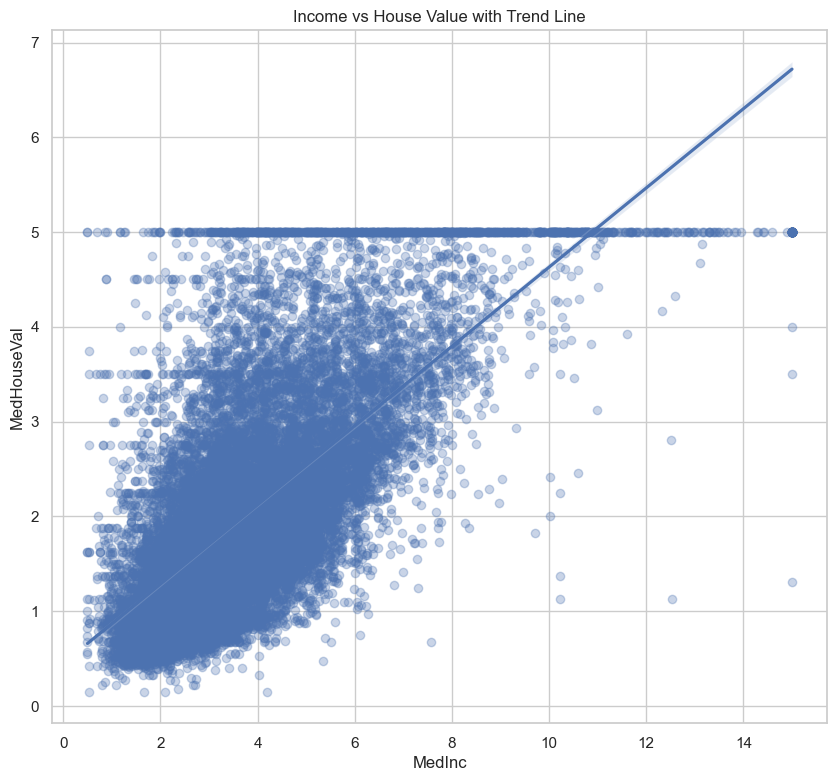

In [28]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,9))
sns.regplot(x="MedInc", y="MedHouseVal", data=df, scatter_kws={'alpha':0.3})
plt.title("Income vs House Value with Trend Line")
plt.show

# Stept 4: Outlier detection & Removal

In [32]:
from scipy import stats

# Z-score method to remove extreme outliers
z_scores = np.abs(stats.zscore(df))

df_no_outliers = df[(z_scores < 3).all(axis=1)]
print("Original shape:", df.shape)
print("After outlier removal:", df_no_outliers.shape)
df = df_no_outliers
df

Original shape: (18738, 9)
After outlier removal: (17943, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#  Step 5:Feature Transformation

In [36]:
# Here I am using  PowerTransformer to reduce skewness

from sklearn.preprocessing import PowerTransformer

features = df.drop("MedHouseVal", axis=1)
scaler_transform = PowerTransformer()
features_transformed = scaler_transform.fit_transform(features)
X = pd.DataFrame(features_transformed, columns=features.columns)
y = df["MedHouseVal"]
X


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.375308,0.929910,1.654148,-0.317299,-1.821477,-0.413156,1.084537,-2.081668e-15
1,2.366511,-0.667797,0.994787,-1.087134,1.524853,-1.194810,1.077748,-2.081668e-15
2,1.960287,1.758267,2.774890,0.360495,-1.332446,-0.023639,1.074346,-2.081668e-15
3,1.236071,1.758267,0.616220,0.355415,-1.181804,-0.425619,1.074346,-2.081668e-15
4,0.226145,1.758267,1.033831,0.460085,-1.165387,-1.061551,1.074346,-2.081668e-15
...,...,...,...,...,...,...,...,...
17938,0.138787,-0.091381,1.474327,1.287110,-0.236818,0.307552,1.509039,-1.582068e-15
17939,-1.680071,-0.335649,-0.092179,1.110725,-0.582797,-0.404901,1.565794,-1.249001e-15
17940,-1.528052,-1.008774,0.056321,0.950801,-0.294083,-0.802629,1.552441,-1.332268e-15
17941,-1.354698,-0.922593,0.170732,1.558739,-0.784580,-1.169697,1.552441,-1.415534e-15


In [37]:
y


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20634    1.168
20635    0.781
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 17943, dtype: float64

# Step 6: Train_Test_Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Step 7: Feature Scaling

In [39]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 8: Train Linear Regression

In [40]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)


# Step 9 : Model Evaluation

In [41]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Squared Error (MSE): 0.4547757577338896
Root Mean Squared Error (RMSE): 0.6743706382501314
R² Score: 0.6107548931524966


# Step 10: Cross_validation

In [42]:
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring="r2")
print("Cross-validation R² scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores))


Cross-validation R² scores: [0.61168977 0.62749119 0.59714858 0.62859775 0.61064537]
Average CV R²: 0.6151145313539346


# Step 11:vizualize Prediction

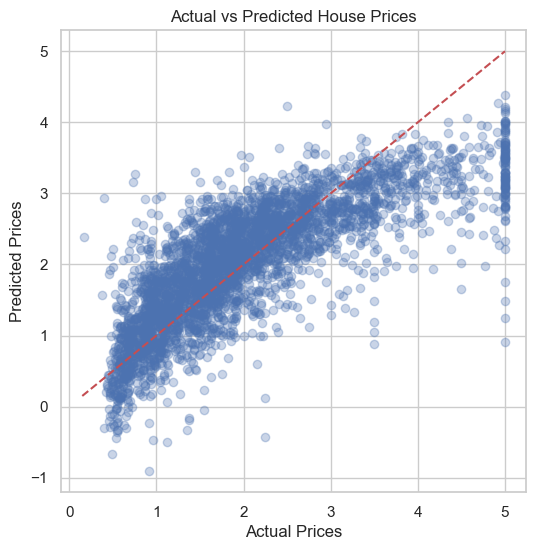

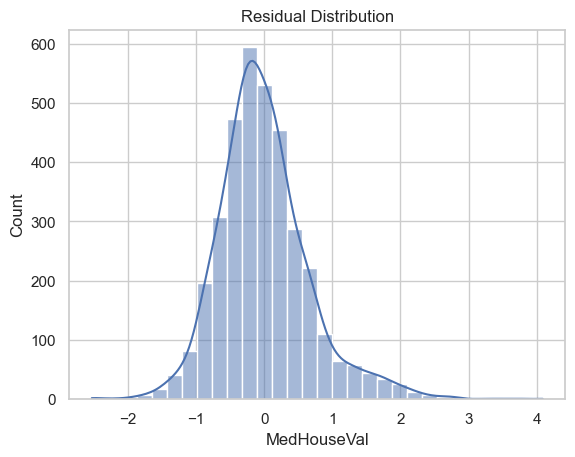

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Residuals
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.show()


# step 11: Feature importance (coefficient)

In [44]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=["Coefficient"])
coeff_df.sort_values(by="Coefficient", ascending=False)

# Note:
#Positive coefficient → increases house price

#Negative coefficient → decreases house price

,Coefficient
MedInc,0.720140
HouseAge,0.165844
AveBedrms,0.118214
Population,0.030971
AveRooms,-0.121429
AveOccup,-0.272007
Longitude,-0.844260
Latitude,-0.902275
